In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("supervised learning_assignment_dataset.csv")
df.head()


,id,gpa,gre,college_prep,major_applied,num_ext_act,num_ap_passed,essay_score,num_letter_rec,fasfa_status,admission
0,1,3.43,284,Yes,Communications,1,8,6,3,Completed,Rejected
1,2,3.31,297,Yes,Communications,4,8,10,3,In Progress,Accepted
2,3,3.08,304,Yes,Life Sciences,0,5,7,3,Not Started,Accepted
3,4,3.70,309,Yes,Social Sciences,0,7,4,2,In Progress,Accepted
4,5,3.04,295,No,Communications,5,5,10,2,Completed,Accepted


## Data Exploration and Data Visualization

* Find the standard deviation for essay score,  number of AP passed, gpa, and gre features.

In [2]:
# standard deviation of essay_score
df['essay_score'].std()

2.2882063239855026

In [3]:
# standard deviation of num_ap_passed
df['num_ap_passed'].std()

2.5830600903535355

In [4]:
# standards deviation of gpa
df['gpa'].std()

0.43334585028708705

In [5]:
# standard deivation of gre
df['gre'].std()

14.994175609298702

* Complete visualizations for all features in the data to learn about each of the features

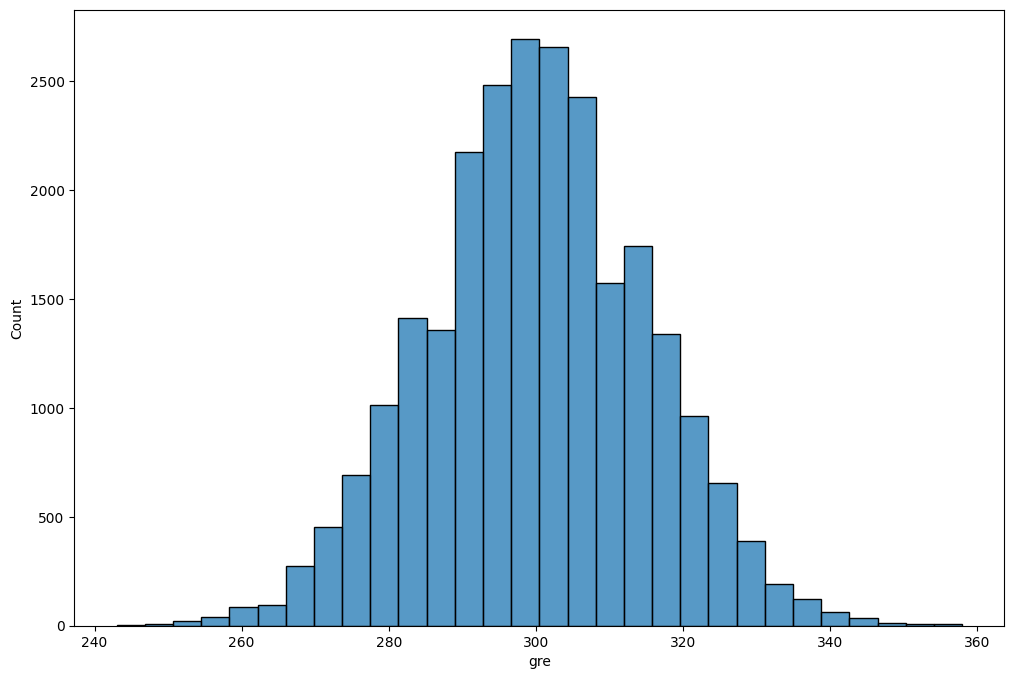

In [6]:
# histogram of the gre

plt.figure(figsize=(12,8))
sns.histplot(df['gre'].dropna(), kde=False, bins=30)
plt.show()

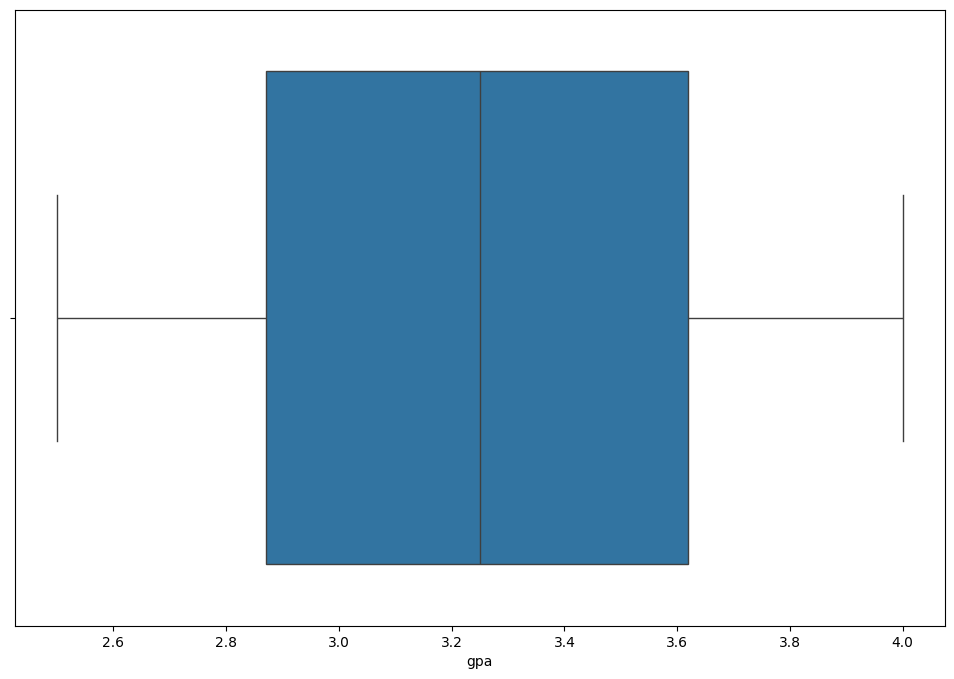

In [7]:
# histogram of gpa
plt.figure(figsize=(12,8))
sns.boxplot(x=df['gpa'])
plt.show()


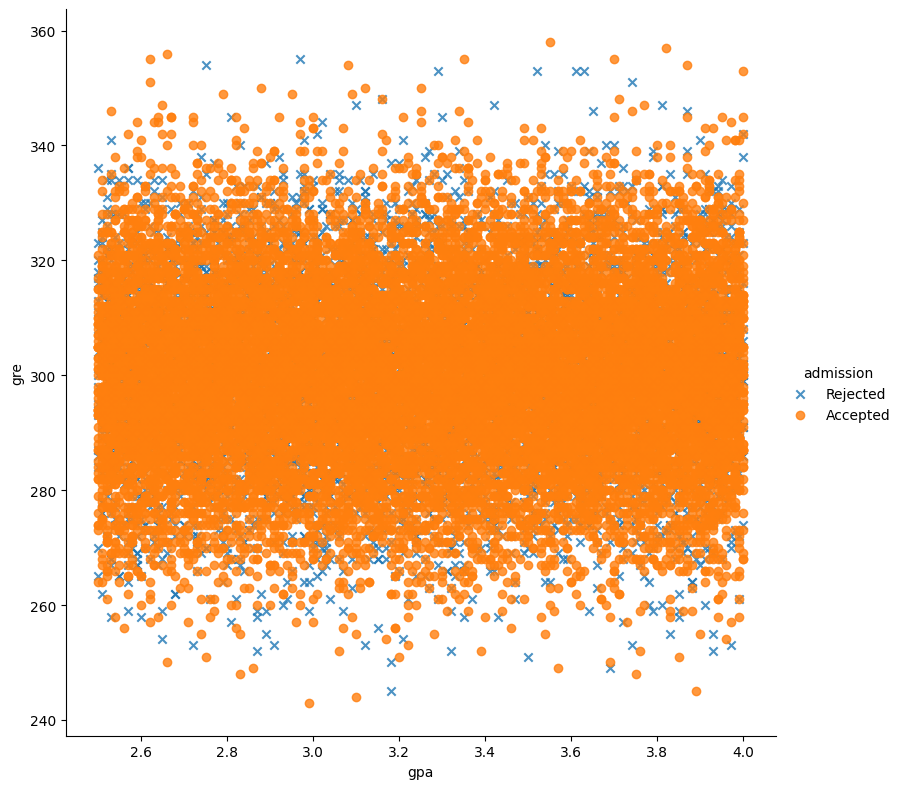

In [8]:
# scatterplot of GPA and GRE based on admission result

sns.lmplot(x='gpa', y='gre',
           data=df,
           hue='admission',
           markers=['x', 'o'],
           height=8,
           aspect=1,
           fit_reg=False)


<Axes: xlabel='major_applied'>

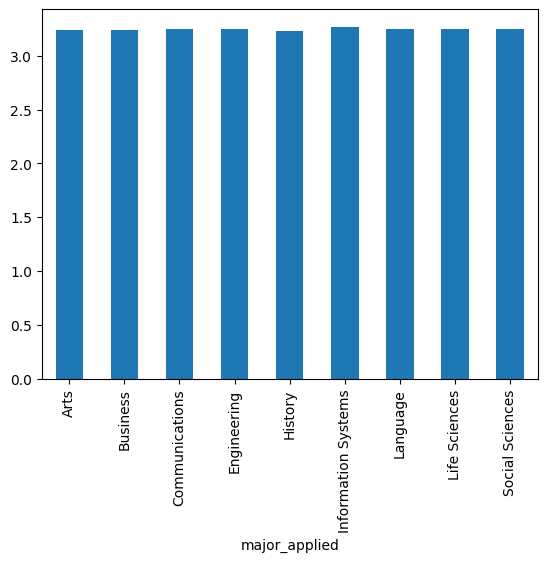

In [10]:
df.groupby('major_applied')['gpa'].mean().plot.bar()

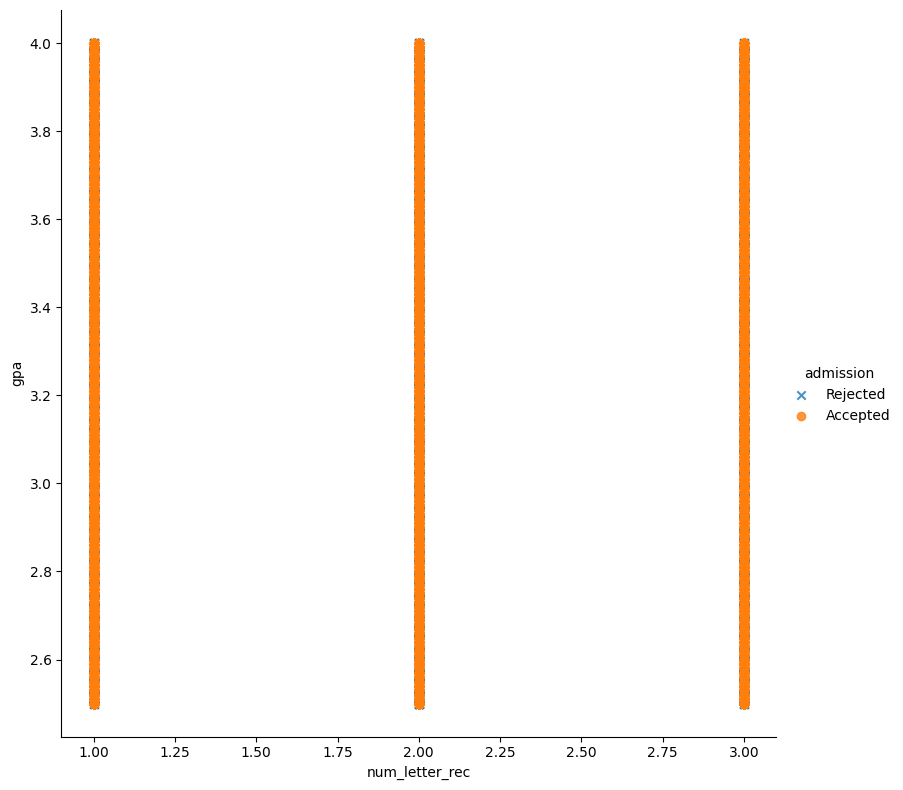

In [11]:
sns.lmplot(x='num_letter_rec', y='gpa',
           data=df,
           hue='admission',
           markers=['x', 'o'],
           height=8,
           aspect=1,
           fit_reg=False)

* The target is admission. In a cell describe its distribution.



Text(0.5, 0, 'gpa')

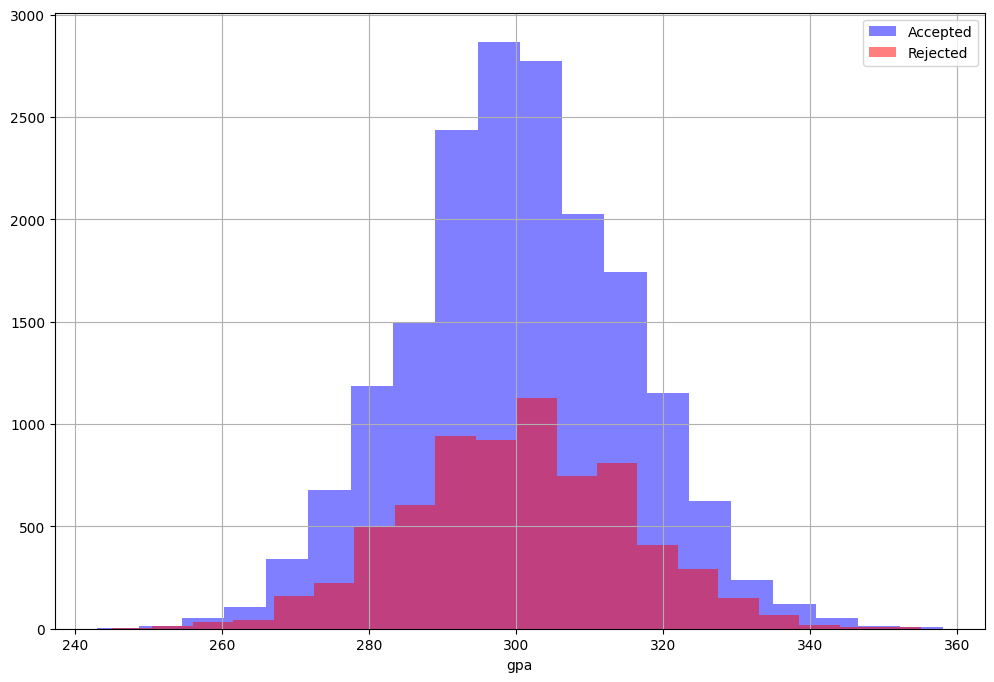

In [15]:
plt.figure(figsize=(12,8))

df[df['admission'] == 'Accepted']['gre'].hist(alpha=0.5, color='blue', bins=20, label='Accepted')
df[df['admission'] == 'Rejected']['gre'].hist(alpha=0.5, color='red', bins=20, label='Rejected')

plt.legend()

plt.xlabel('gpa')

## Data Curation

* Dummy Code all categorical features

In [16]:
df.select_dtypes(exclude='number').columns

Index(['college_prep', 'major_applied', 'fasfa_status', 'admission'], dtype='object')

In [18]:
df2 = pd.get_dummies(df, columns=['college_prep'], drop_first=True, dtype=int)
df2.rename(columns={'college_prep_Yes':'college_prep'}, inplace=True)
df2.head()

,id,gpa,gre,major_applied,num_ext_act,num_ap_passed,essay_score,num_letter_rec,fasfa_status,admission,college_prep
0,1,3.43,284,Communications,1,8,6,3,Completed,Rejected,1
1,2,3.31,297,Communications,4,8,10,3,In Progress,Accepted,1
2,3,3.08,304,Life Sciences,0,5,7,3,Not Started,Accepted,1
3,4,3.70,309,Social Sciences,0,7,4,2,In Progress,Accepted,1
4,5,3.04,295,Communications,5,5,10,2,Completed,Accepted,0


In [28]:
df3 = pd.get_dummies(df2, columns=['fasfa_status'], drop_first=True, dtype=int)
df4 = pd.get_dummies(df3, columns=['major_applied'], drop_first=True, dtype=int)
final_data = pd.get_dummies(df4, columns=['admission'], drop_first=True, dtype=int)
final_data.rename(columns={'admission_Rejected':'admission'}, inplace=True)
final_data.head()

,id,gpa,gre,num_ext_act,num_ap_passed,essay_score,num_letter_rec,college_prep,fasfa_status_In Progress,fasfa_status_Not Started,major_applied_Business,major_applied_Communications,major_applied_Engineering,major_applied_History,major_applied_Information Systems,major_applied_Language,major_applied_Life Sciences,major_applied_Social Sciences,admission
0,1,3.43,284,1,8,6,3,1,0,0,0,1,0,0,0,0,0,0,1
1,2,3.31,297,4,8,10,3,1,1,0,0,1,0,0,0,0,0,0,0
2,3,3.08,304,0,5,7,3,1,0,1,0,0,0,0,0,0,1,0,0
3,4,3.70,309,0,7,4,2,1,1,0,0,0,0,0,0,0,0,1,0
4,5,3.04,295,5,5,10,2,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
final_data.drop(columns=['id'], inplace=True)
final_data.head()

,gpa,gre,num_ext_act,num_ap_passed,essay_score,num_letter_rec,college_prep,fasfa_status_In Progress,fasfa_status_Not Started,major_applied_Business,major_applied_Communications,major_applied_Engineering,major_applied_History,major_applied_Information Systems,major_applied_Language,major_applied_Life Sciences,major_applied_Social Sciences,admission
0,3.43,284,1,8,6,3,1,0,0,0,1,0,0,0,0,0,0,1
1,3.31,297,4,8,10,3,1,1,0,0,1,0,0,0,0,0,0,0
2,3.08,304,0,5,7,3,1,0,1,0,0,0,0,0,0,1,0,0
3,3.70,309,0,7,4,2,1,1,0,0,0,0,0,0,0,0,1,0
4,3.04,295,5,5,10,2,0,0,0,0,1,0,0,0,0,0,0,0


## Supervised Learning

* Train either a Decision Tree model.

In [30]:
from sklearn.model_selection import train_test_split

X = final_data.drop('admission', axis=1)
y = final_data['admission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=5)

dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

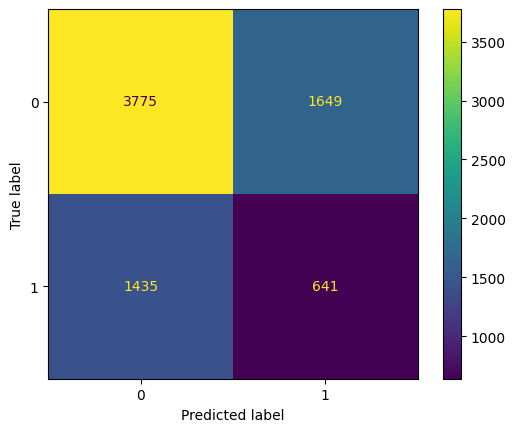

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

confusion_dt = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_dt,
                              display_labels = dtree.classes_)

disp.plot()
plt.show()


* Descibe the evaluation of your model. Include the accuracy and precision. If appropriate add the Area Under the ROC Curve.

In [33]:
from sklearn.metrics import accuracy_score


dtree_accuracy = accuracy_score(y_test, predictions)
print("Accuracy of Decision Trees")
print(dtree_accuracy)

Accuracy of Decision Trees
0.5888


In [34]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5424
           1       0.28      0.31      0.29      2076

    accuracy                           0.59      7500
   macro avg       0.50      0.50      0.50      7500
weighted avg       0.60      0.59      0.59      7500



Text(0.5, 1.0, 'Random Forest\nAccuracy: 58.88%')

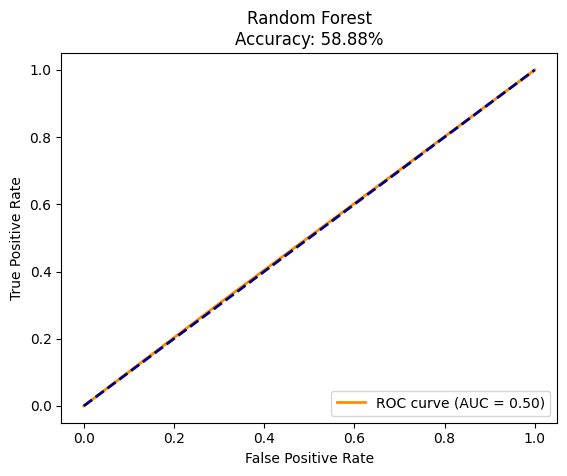

In [39]:
from sklearn.metrics import auc, roc_curve

#
y_prob_dt = dtree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Random Forest\nAccuracy: {:.2f}%'.format(dtree_accuracy * 100))